## Lab Brief - Statistical Learning with Python

### Part-1

## Measures of Data

Descriptive Statistcs are measures that summarize important features of data. Producing these descriptive statistics is a common first step to take after cleaning and preparing a dataset for further analysis. Examples are like calculating Mean or Median. In this lab, we will be looking into some of these functions and explore several new ones.

#### Measures of Central Tendency

Whenever you measure things of the same kind, a fairly large number of such measurements will tend to cluster around the middle value. Such a value is called a measure of "Central Tendency". The other terms that are used synonymously are "Measures of Location", or "Statistical Averages". 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

mtcars = pd.read_csv('mtcars.csv')

##### Using the mtcars dataset.

For the below set of questions, we will be using the cars data from [Motor Trend Car Road Tests](http://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html)

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models). 


Details :
    
A data frame with 32 observations on 11 (numeric) variables.

[, 1] 	mpg 	Miles/(US) gallon

[, 2] 	cyl 	Number of cylinders

[, 3] 	disp 	Displacement (cu.in.)

[, 4] 	hp 	Gross horsepower

[, 5] 	drat 	Rear axle ratio

[, 6] 	wt 	Weight (1000 lbs)

[, 7] 	qsec 	1/4 mile time

[, 8] 	vs 	Engine (0 = V-shaped, 1 = straight)

[, 9] 	am 	Transmission (0 = automatic, 1 = manual)

[,10] 	gear 	Number of forward gears

[,11] 	carb 	Number of carburetors 

#### Explore the data - Setting the index

In [2]:
mtcars.index = mtcars["name"]
mtcars.head()
# mtcars.mean() #By default this will give the mean of each column

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Question 1

What is the first car name given in mtcars?

** Make use of index which has been set previously **

**Hint**: Use .loc function


In [3]:
mtcars.loc[:,'name'].iloc[0]

'Mazda RX4'

### Question 2
What is the highest difference between the hp and cyl?

**Hint:** You can use **max()** function to find the difference

In [4]:
pd.DataFrame.max(mtcars['hp'] - mtcars['cyl']) #The value of the max difference

327

In [5]:
(mtcars['hp'] - mtcars['cyl']).abs().idxmax() #The index of the row with the highest difference

'Maserati Bora'

In [6]:
mtcars.loc[[(mtcars['hp'] - mtcars['cyl']).abs().idxmax()]] #The record that has the highest difference

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,,
Maserati Bora,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


### Question 3
What are the cars having highest weight(wt) and lowest weight(wt)?

**Hint:** Use idxmax() and idxmin() to locate the row

Use **.iloc** function to print the  row

**Note:** Both idxmax and idxmin belong to pandas

In [7]:
print('The car with max weight: ', mtcars['wt'].idxmax(axis=1))
print('The car with min weight: ', mtcars['wt'].idxmin(axis=1))

The car with max weight:  Lincoln Continental
The car with min weight:  Lotus Europa


In [8]:
mtcars.loc[ [mtcars['wt'].idxmax(axis=1), mtcars['wt'].idxmin(axis=1)] ] #The records with highest and lowest weight

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,,
Lincoln Continental,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
Lotus Europa,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


### Question 4

Find the mean of each row and each column in the given dataset.

**Hint:** Use .mean() function. To operate on rows use **axis=0**, on columns use **axis=1**

In [9]:
pd.DataFrame.mean(mtcars) #Mean of each column

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [10]:
pd.DataFrame.mean(mtcars, axis=1) #Mean of each row

name
Mazda RX4              29.907273
Mazda RX4 Wag          29.981364
Datsun 710             23.598182
Hornet 4 Drive         38.739545
Hornet Sportabout      53.664545
Valiant                35.049091
Duster 360             59.720000
Merc 240D              24.634545
Merc 230               27.233636
Merc 280               31.860000
Merc 280C              31.787273
Merc 450SE             46.430909
Merc 450SL             46.500000
Merc 450SLC            46.350000
Cadillac Fleetwood     66.232727
Lincoln Continental    66.058545
Chrysler Imperial      65.972273
Fiat 128               19.440909
Honda Civic            17.742273
Toyota Corolla         18.814091
Toyota Corona          24.888636
Dodge Challenger       47.240909
AMC Javelin            46.007727
Camaro Z28             58.752727
Pontiac Firebird       57.379545
Fiat X1-9              18.928636
Porsche 914-2          24.779091
Lotus Europa           24.880273
Ford Pantera L         60.971818
Ferrari Dino           34.508182
Maser

### Question 5

Plot mpg values of mtcards dataframe using matplotlib.

**Hint: Use plt.plot function**

<BarContainer object of 32 artists>

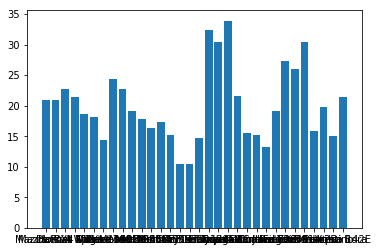

In [11]:
plt.bar(mtcars.loc[:,'name'],mtcars.loc[:,'mpg'],width=0.8)

## Part 2

## Measures of Dispersion

Measures of Dispersion (Spread) are statistics that describe how data varies. Measure of dispersion gives us the sense of how much the data tends to diverge from the central tendency.

### Question 6

What the range of `mpg` in the given dataset?

**Hint:** Range = max-min

In [12]:
mtcars['mpg'].max() - mtcars['mpg'].min()

23.5

### Question 7

Calculate the 25th quantile (lower quantile)for `mpg` in the given dataset.

**Hint:** Use **.quantile()**

In [13]:
mtcars.mpg.quantile(q=0.25)

15.425

### Question 8

Calculate the Inter-Quartile Range(IQR) for `mpg` in the given dataset.

Interquartile range (IQR) is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile.

**Hint:** IQR = Q3 - Q1

In [14]:
mtcars.mpg.quantile(q=0.75) - mtcars.mpg.quantile(q=0.25)

7.375

### Question 9

Calculate the Variance, Standard Deviation and Median Absolute Deviation for `mpg`.

Variance and Standard Deviation are two other common measure of dispersion.

**Hint:** Use .var() and .std()

**Hint:** Median Absolute Deviation - alternative measure of spread based on the median. It is the median of the absolute value of the deviations from the median. 

In [15]:
mtcars.mpg.var()

36.32410282258065

In [16]:
mtcars.mpg.std()

6.026948052089105

In [17]:
mtcars.mpg.mad()

4.714453125

## Part 3

## Probability Distributions

The probability distribution describes how a random variable is distributed. It tells us which values a variable is most likely to take on and which values are less likely to take on. 

Each value in the given range is equally likely to occur. 

In [18]:
import scipy.stats as stats # Many functions for probability distributions in python are in scipy.stats

### Question 10

Generate 1000 datapoints with standard normal distribution with mean 0 and standard deviation 1. 

#### Normal Distribution

The normal or Gaussian Distribution is a continuos probability distribution given by a symmetric bell shaped curve. It is defined its center(mean) and spread(std).

The bulk of the observations generated from a normal distribution lie near the mean which lies at the center. About 68% of the data lies within 1 std, 95% lies within 2 stds and 99.7% lies within 3 stds.

**Hint:** You can use **np.random.normal()** function to generate normal distribution

In [19]:
pd.DataFrame(np.random.normal(0,1,1000),columns=['Datapoints'])

,Datapoints
0,-1.617902
1,0.249591
2,-0.858917
3,-0.742943
4,0.140632
5,-0.888077
6,-0.764806
7,-0.239447
8,0.854247
9,0.687121


## Question 11

Generate binomial distribution data for fair coin flipping of size 100. Assume `0` for head and `1` for tail.

[ **Hint:** For fair coin flip `p=0.5` ]

#### Binomial Distribution

It is defined by 2 parameters: the probability of success and the number of trails. It tells about how likely it is possible to get a given number of successes in n trails.

In [20]:
np.random.binomial(n=1,p=0.5,size=100)

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

#### Visualizing Poisson Distribution

It models the probability of seeing certain number of successes within a time interval.

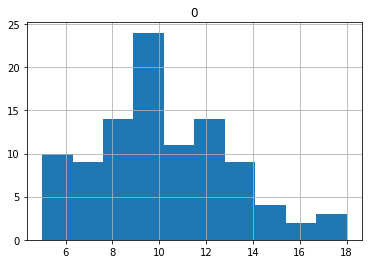

In [21]:
poisson_data = stats.poisson.rvs(size=100,mu=10)

pd.DataFrame(poisson_data).hist()

plt.show()